<a href="https://colab.research.google.com/github/Buggermenot/TimeSeries-Labs23/blob/main/TS_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from datetime import datetime

In [ ]:
data = pd.read_csv('bike_sharing_data.csv')
data = data.drop('instant', axis=1)

data['dteday'] = pd.to_datetime(data['dteday'],
               format='%d-%m-%Y')

data.set_index('dteday', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 85.5 KB


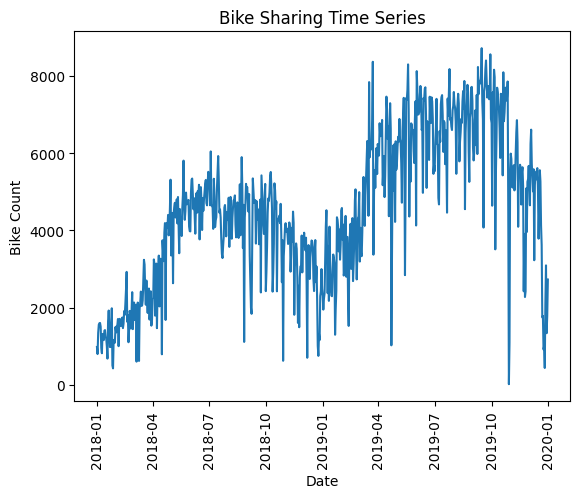

In [ ]:
plt.plot(data['cnt'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Bike Count')
plt.title('Bike Sharing Time Series')
plt.show()

In [ ]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

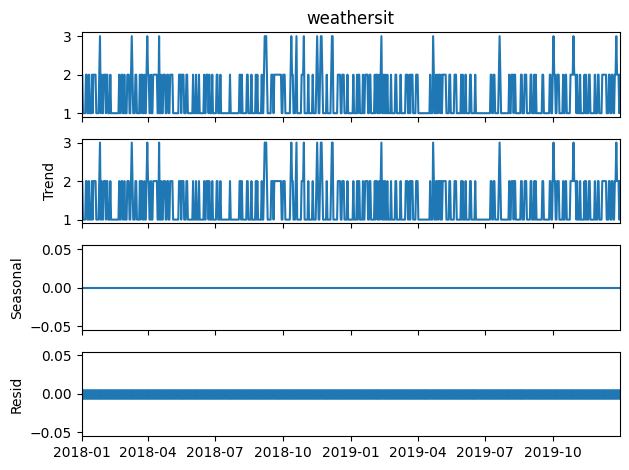

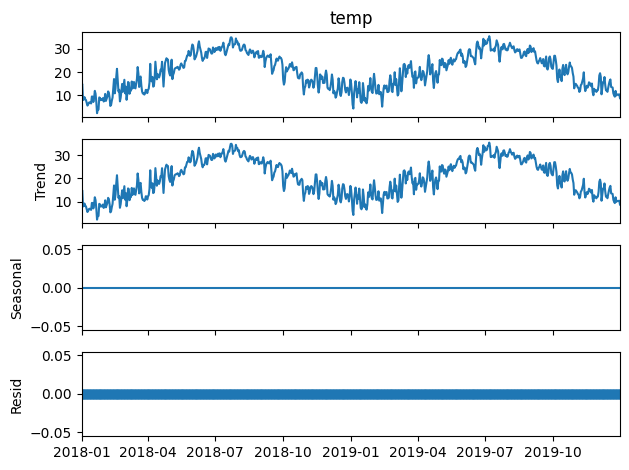

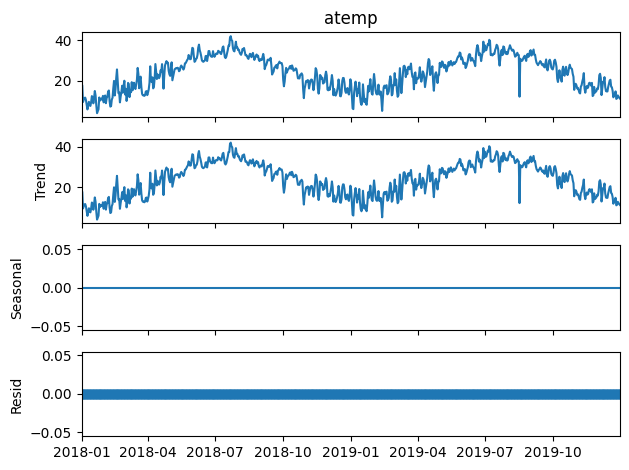

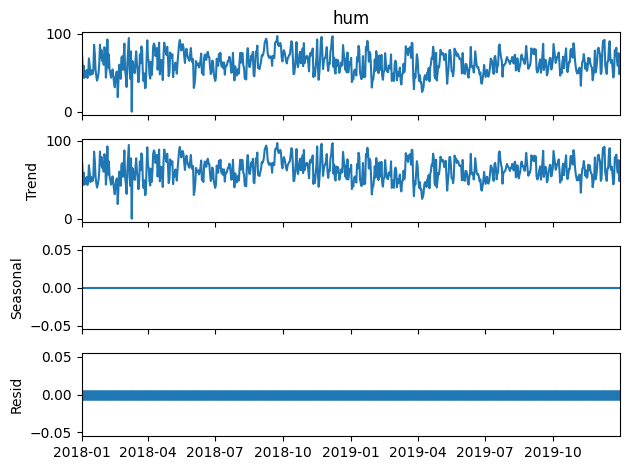

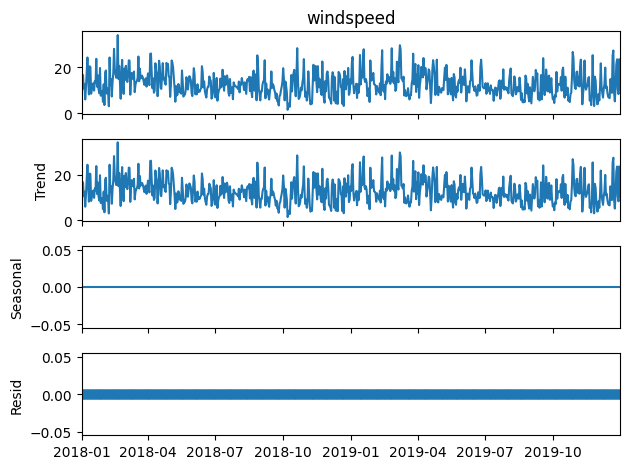

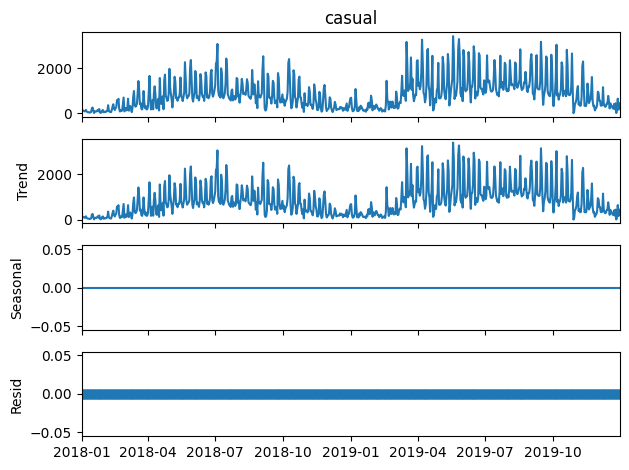

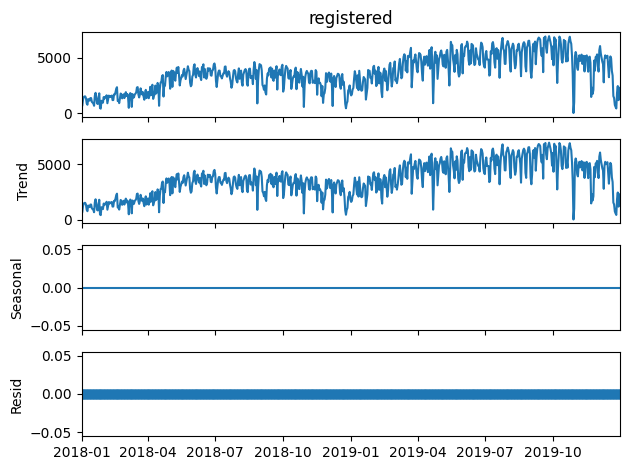

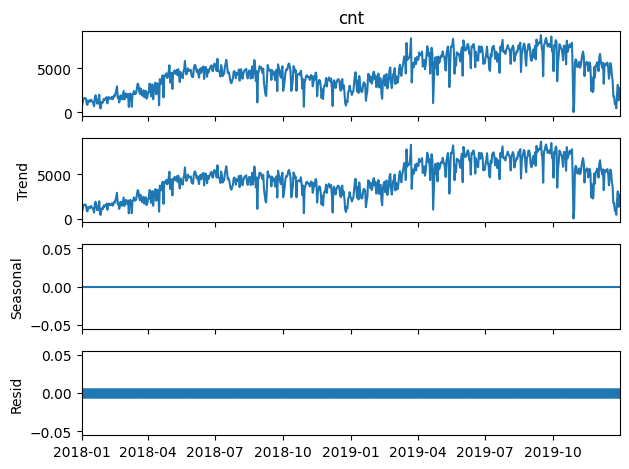

In [ ]:
important_cols = data.columns[6:]

for col in important_cols:
  result = seasonal_decompose(data[col], model='additive', period=1)
  result.plot()
  plt.show()

In [ ]:
# ADF test for stationarity
result = adfuller(data['cnt'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print('The data is stationary.')
else:
    print('The data is non-stationary.')

ADF Statistic: -1.8626895329255975
p-value: 0.349811450040857
The data is non-stationary.


In [ ]:
correlation_matrix = data.corr()
plt.scatter(correlation_matrix)

In [ ]:
# Square Root Transform
data['Bike_Count_Sqrt'] = np.sqrt(data['Bike_Count'])
plt.plot(data['Bike_Count_Sqrt'])

In [ ]:
# Log Transform
data['Bike_Count_Log'] = np.log(data['Bike_Count'])

# Box-Cox Transform
data['Bike_Count_BoxCox'], _ = stats.boxcox(data['Bike_Count'])
